In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
#читаем csv файл и записываем его в массив
start_data = pd.read_csv('VDNH_weather.csv', sep = ';', header = 0, index_col = False)
data = np.array(start_data.loc[0:start_data.shape[0],:])
start_data.tail(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
60677,02.02.2005 03:00,-9.3,752.2,767.6,NaN,82.0,"Ветер, дующий с юго-востока",2.0,NaN,NaN,...,NaN,NaN,NaN,-11.8,NaN,NaN,NaN,NaN,NaN,NaN
60678,02.02.2005 00:00,-9.1,751.0,766.3,NaN,85.0,"Ветер, дующий с юго-востока",2.0,NaN,NaN,...,NaN,"Перисто-кучевые одни или перисто-кучевые, сопр...",NaN,-11.1,NaN,NaN,NaN,NaN,NaN,NaN
60679,01.02.2005 21:00,-8.9,750.0,765.3,NaN,83.0,"Ветер, дующий с юго-востока",2.0,NaN,NaN,...,NaN,NaN,NaN,-11.3,1.0,12.0,NaN,NaN,NaN,NaN
60680,01.02.2005 18:00,-7.9,748.7,764.0,NaN,87.0,"Ветер, дующий с востоко-юго-востока",2.0,NaN,NaN,...,NaN,NaN,NaN,-9.7,NaN,NaN,NaN,NaN,NaN,NaN
60681,01.02.2005 15:00,-6.6,746.8,761.8,NaN,83.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN
60682,01.02.2005 12:00,-7.1,745.0,760.0,NaN,85.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,NaN,NaN,10.0,-9.2,NaN,NaN,NaN,NaN,NaN,NaN
60683,01.02.2005 09:00,-8.6,743.5,758.6,NaN,89.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",4.0,-10.1,3.0,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,43.0
60684,01.02.2005 06:00,-8.2,742.8,757.9,NaN,90.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",NaN,-9.6,2.0,12.0,NaN,NaN,NaN,NaN
60685,01.02.2005 03:00,-8.6,743.0,758.1,NaN,89.0,"Ветер, дующий с юго-востока",2.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",NaN,-10.1,NaN,NaN,NaN,NaN,NaN,NaN
60686,01.02.2005 00:00,-8.3,743.0,758.1,NaN,89.0,"Ветер, дующий с юго-востока",2.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",NaN,-10.1,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#проверяем размеры массива
start_data.shape

(60687, 29)

In [7]:
#считаем пробелы (nan)
for i in range(start_data.shape[0]):
    if str(data[i][1]) == 'nan':
        print(i)

1086
6246
37578
45003
46050
54976
59459


In [8]:
#убираем пробелы в данных средним арифметическим соседних ячеек
for i in range(start_data.shape[0]):
    if str(data[i][1]) == 'nan':
        data[i][1] = (data[i + 1][1] + data[i - 1][1]) / 2

In [9]:
#повторно считаем пробелы (nan)
for i in range(start_data.shape[0]):
    if str(data[i][1]) == 'nan':
        print(i)

In [10]:
#делаем первый столбец объектами datetime
for i in range(start_data.shape[0]):
    data[i][0] = datetime.datetime.strptime(data[i][0], '%d.%m.%Y %H:%M')

In [11]:
#создаем массив из уникальных дней
unic_days = []
unic_days.append(data[0][0])
k = 0 
for i in range(start_data.shape[0]):
    if data[i][0].date() == unic_days[k].date():
        continue
    else:
        unic_days.append(data[i][0])
        k += 1

In [12]:
#оставляем в каждом элементе массива информацию только о дате 
for i in range(len(unic_days)):
    unic_days[i] = unic_days[i].date()

In [13]:
#создаем массив из уникальных месяцев
unic_months = []
unic_months.append(data[0][0])
k = 0 
for i in range(start_data.shape[0]):
    if data[i][0].month == unic_months[k].month:
        continue
    else:
        unic_months.append(data[i][0])
        k += 1

In [14]:
#оставляем в каждом элементе массива информацию только о дате 
for i in range(len(unic_months)):
    unic_months[i] = unic_months[i].date()

In [15]:
#определяем количество измерений погоды за день
measurement_per_day = []
k = 0
for i in range(len(unic_days)):
    count = 0
    while data[k][0].date() == unic_days[i] and k != start_data.shape[0] - 1:
        count += 1
        k += 1
    measurement_per_day.append(count)
measurement_per_day[-1] += 1

In [16]:
#подсчет средней температуры за день
T_day_middle = []
line = 0
for i in range(len(unic_days)):
    sum = 0
    for j in range(line, line + measurement_per_day[i]):
        sum += data[j][1]
    T_day_middle.append(sum / measurement_per_day[i])
    line += measurement_per_day[i]

In [17]:
#подсчет средней температуры за каждый месяц
T_month_middle = []
line = 0
for i in range(len(unic_months)):
    sum = 0
    for j in range(line, line + unic_months[i].day):
        if j < len(unic_days): sum += T_day_middle[j]
    T_month_middle.append(sum / unic_months[i].day)
    line += unic_months[i].day

In [18]:
#подсчет минимальной температуры за день
T_day_min = []
line = 0
for i in range(len(unic_days)):
    day = []
    for j in range(line, line + measurement_per_day[i]):
        day.append(data[j][1])
    T_day_min.append(np.min(day))
    line += measurement_per_day[i]

In [19]:
#подсчет средней минимальной температуры за каждый месяц
T_month_min = []
line = 0
for i in range(len(unic_months)):
    day = []
    for j in range(line, line + unic_months[i].day):
        if j < len(unic_days): day.append(T_day_min[j])
    T_month_min.append(np.mean(day))
    line += unic_months[i].day

In [20]:
#подсчет максимальной температуры за день
T_day_max = []
line = 0
for i in range(len(unic_days)):
    day = []
    for j in range(line, line + measurement_per_day[i]):
        day.append(data[j][1])
    T_day_max.append(np.max(day))
    line += measurement_per_day[i]

In [21]:
#подсчет средней максимальной температуры за каждый месяц
T_month_max = []
line = 0
for i in range(len(unic_months)):
    day = []
    for j in range(line, line + unic_months[i].day):
        if j < len(unic_days): day.append(T_day_max[j])
    T_month_max.append(np.mean(day))
    line += unic_months[i].day

In [22]:
T_June_middle = []
for i in range(len(unic_months)):
    if unic_months[i].month == 6:
        T_June_middle.append(T_month_middle[i])
T_June_min = []
for i in range(len(unic_months)):
    if unic_months[i].month == 6:
        T_June_min.append(T_month_min[i])
T_June_max = []
for i in range(len(unic_months)):
    if unic_months[i].month == 6:
        T_June_max.append(T_month_max[i])

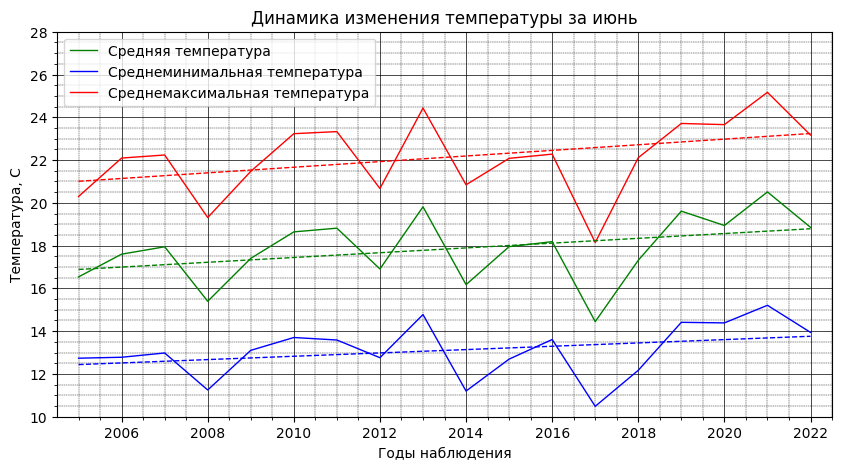

In [23]:
years = np.arange(2005, 2023)
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.minorticks_on()
ax.grid(which= 'minor', color = 'k', linestyle = '--', linewidth = 0.3)
ax.grid(which= 'major', color = 'k', linewidth = 0.5)
plt.plot(years, T_June_middle[::-1],'g', linewidth=1, label = 'Средняя температура')
plt.plot(years, T_June_min[::-1], 'b' , linewidth=1, label = 'Среднеминимальная температура')
plt.plot(years, T_June_max[::-1], 'r', linewidth=1, label = 'Среднемаксимальная температура')
plt.title('Динамика изменения температуры за июнь')
ax.legend()
ax.set(ylim=(10, 28))
ax.set(xlim=(2004.5, 2022.5))

ax.set(xlabel='Годы наблюдения')
ax.set(ylabel='Температура, С')

z = np.polyfit (years, T_June_max[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'r--', linewidth=1) 

z = np.polyfit (years, T_June_middle[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'g--', linewidth=1) 
max = np.max(p_1(years))
min = np.min(p_1(years))

z = np.polyfit (years, T_June_min[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'b--', linewidth=1) 
fig.savefig('T_June.png', dpi = 300, bbox_inches = 'tight')

In [24]:
T_July_middle = []
for i in range(len(unic_months)):
    if unic_months[i].month == 7:
        T_July_middle.append(T_month_middle[i])
T_July_min = []
for i in range(len(unic_months)):
    if unic_months[i].month == 7:
        T_July_min.append(T_month_min[i])
T_July_max = []
for i in range(len(unic_months)):
    if unic_months[i].month == 7:
        T_July_max.append(T_month_max[i])

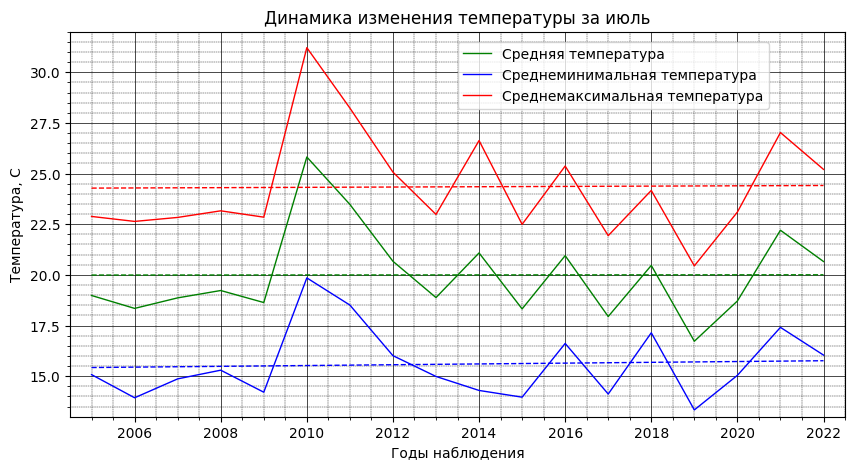

In [25]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.minorticks_on()
ax.grid(which= 'minor', color = 'k', linestyle = '--', linewidth = 0.3)
ax.grid(which= 'major', color = 'k', linewidth = 0.5)
plt.plot(years, T_July_middle[::-1],'g', linewidth=1, label = 'Средняя температура')
plt.plot(years, T_July_min[::-1], 'b', linewidth=1, label = 'Среднеминимальная температура')
plt.plot(years, T_July_max[::-1], 'r', linewidth=1, label = 'Среднемаксимальная температура')
plt.title('Динамика изменения температуры за июль')
ax.legend(loc=(0.5, 0.8))

ax.set(xlabel='Годы наблюдения')
ax.set(ylabel='Температура, С')

ax.set(ylim=(13, 32))
ax.set(xlim=(2004.5, 2022.5))

z = np.polyfit (years, T_July_max[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'r--', linewidth=1) 

z = np.polyfit (years, T_July_middle[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'g--', linewidth=1) 

z = np.polyfit (years, T_July_min[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'b--', linewidth=1) 

fig.savefig('T_July.png', dpi = 300, bbox_inches = 'tight')

In [26]:
T_August_middle = []
for i in range(len(unic_months)):
    if unic_months[i].month == 8:
        T_August_middle.append(T_month_middle[i])
T_August_min = []
for i in range(len(unic_months)):
    if unic_months[i].month == 8:
        T_August_min.append(T_month_min[i])
T_August_max = []
for i in range(len(unic_months)):
    if unic_months[i].month == 8:
        T_August_max.append(T_month_max[i])

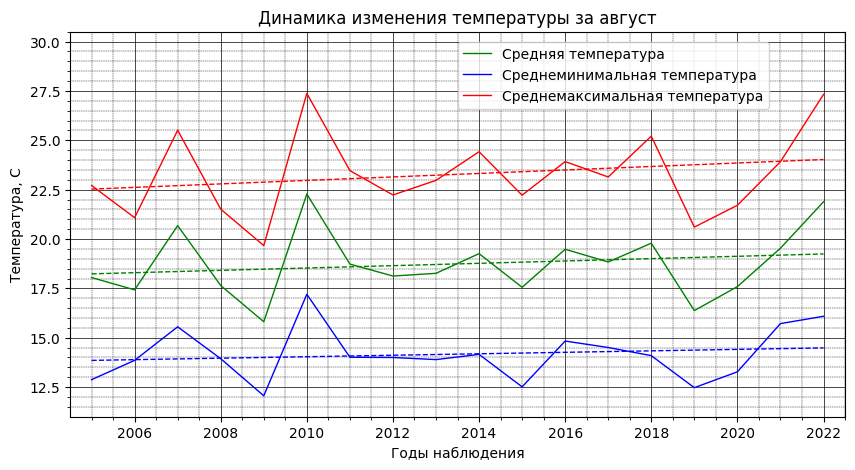

In [27]:
fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(10)
ax.minorticks_on()
ax.grid(which= 'minor', color = 'k', linestyle = '--', linewidth = 0.3)
ax.grid(which= 'major', color = 'k', linewidth = 0.5)
plt.plot(years, T_August_middle[::-1],'g', linewidth=1, label = 'Средняя температура')
plt.plot(years, T_August_min[::-1], 'b', linewidth=1, label = 'Среднеминимальная температура')
plt.plot(years, T_August_max[::-1], 'r', linewidth=1, label = 'Среднемаксимальная температура')
plt.title('Динамика изменения температуры за август')
ax.legend(loc=(0.5, 0.8))

ax.set(ylim=(11, 30.5))
ax.set(xlim=(2004.5, 2022.5))

ax.set(xlabel='Годы наблюдения')
ax.set(ylabel='Температура, С')

z = np.polyfit (years, T_August_max[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'r--', linewidth=1) 

z = np.polyfit (years, T_August_middle[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'g--', linewidth=1) 

z = np.polyfit (years, T_August_min[::-1], 1)
p_1 = np.poly1d (z)
plt.plot (years, p_1(years), 'b--', linewidth=1) 

fig.savefig('T_August.png', dpi = 300, bbox_inches = 'tight')